卷积神经网络之激活函数
===

# 1.激活函数的意义
激活函数的目的，是为了在神经网络中引入非线性的因素，使得我们可以任意学习输入和输出之间的复杂变换

# 2.Sigmoid
- 正向看，函数$y(x)=\frac{1}{1+e^{-x}}$，优点是输出数据可以映射到[0,1]之间,很好 
- 反向看，$y'(x)=y(x)(1-y(x))$。缺点是梯度下降明显，至少减少75%。这是因为$y'$最大值是0.25，如果梯度原来是1，那么1 * 0.25 = 0.25，那么就是梯度损失了1-25%=75%。所以在深度学习中，最后一层可以使用Sigmoid函数。中间层不可使用，因为梯度损失太厉害

(0, 1)

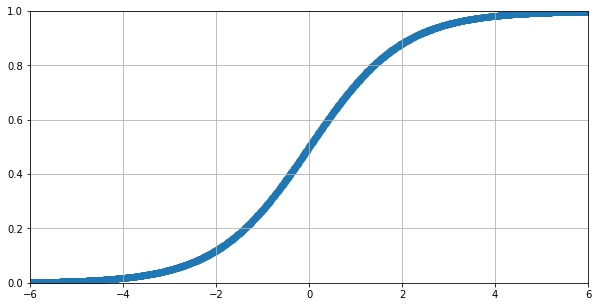

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x = np.linspace(-6, 6, 1000)
y = 1 / (1 + np.exp(-x))
plt.figure(facecolor='w', figsize=(10,5))
plt.scatter(x, y)
plt.grid(True)
plt.xlim((-6, 6))
plt.ylim((0, 1))

# 3.tanh
- 正向看，函数$f(x)=tanh(x)=\frac{2}{1+e^{-2x}}-1$，优点是输出数据可以映射到[-1,1]
- 反向看，$f'(x)=1-f(x)^2$。最大值为1,也就是说只有f(x)=0的时候，反向梯度才是1，但是正向为0，也就没有什么激励过程了

# 4.ReLU(Rectified linear unit)
$$f(x)=\begin{cases}
0 & x \le 0\\\\
x & x \geq 0
\end{cases} f'(x)=\begin{cases}
0 & x \le 0\\\\
1 & x \geq 0
\end{cases}$$
这个函数正向截断负值，损失大量特征，反向梯度没有损失。由于特征特别多，所以损失一些特征没有关系

# 5.Leaky ReLU
$$f(x)=\begin{cases}
0.01x & x \le 0\\\\
x & x \geq 0
\end{cases} f'(x)=\begin{cases}
0.01 & x \le 0\\\\
1 & x \geq 0
\end{cases}$$
优点是保留更多参数，少量梯度反向传播，这个函数可以解决ReLU函数负值神经元失活的问题。你甚至可以创造自己的激励函数来处理自己的问题, 不过要确保的是这些激励函数必须是可以微分的, 因为在误差反向传递的时候, 只有这些可微分的激励函数才能把误差传递回去。传统神经网络，一般使用Sigmoid或者tanh来做激活函数，而卷积神经网络一般使用ReLU和Leaky ReLU来说激活函数

